# Import Libraries

In [82]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

In [29]:
df = pd.read_csv('data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Are medical claims made by smokers greater than those who don't smoke ?

In [30]:
# get cahrges of smoker claimant
smoker_charges = df[df['smoker']=='yes']['charges']
smoker_charges.reset_index(drop=True, inplace=True)

# get cahrges of non-smoker claimant
non_smoker_charges = df[df['smoker']=='no']['charges']
non_smoker_charges.reset_index(drop=True, inplace=True)

C:\Users\merve\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


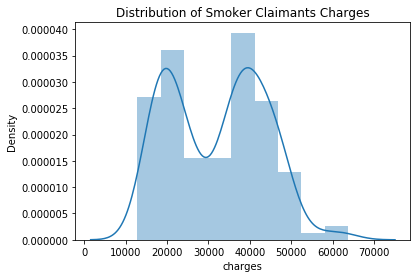

In [31]:
plt.title('Distribution of Smoker Claimants Charges')
sns.distplot(smoker_charges)
plt.show()

C:\Users\merve\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


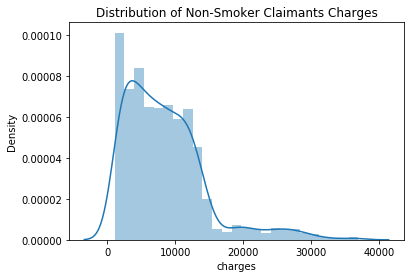

In [32]:
plt.title('Distribution of Non-Smoker Claimants Charges')
sns.distplot(non_smoker_charges)
plt.show()

### 1.State the null hypothesis and alternative hypothesis
H0 :  μs  <= μns
HA :  μs  >  μns

alpha(α) = 0.05

confidence_level = %95 (1-α)
 
μs --> mean of the charge for smoker claimant in the dataset.

μns --> mean of the charge for non-smoker claimant in the dataset.

### 2. Decide the type of hypothesis testing

As there are 2 independent group and as we would like to compare mean of those 2 groups we will going to use use 
**two-sample t test**.

To decide whether to use parametric or non-parametric tests, let's examine whether the assumptions of the two-sample t-test are met.

### 3. Check the assumptions

**Assumptions Of Two Sample T Test :**
    * Continious data
    * Samples data are independent
    * The data follows the normal(Gaussion) distribution
    * Samples variance equality 
    
It is obvious that the first two assumptions are met. However, it needs to be clarified whether the assumptions of normality and equality of variance are met.

To do that we will perform **'Shapiro-Wilks Test'** for normality and **'Levene's test'** for variance equality.


**Shapiro-Wilks test for normality**

H0: The data is normally distributed

Ha: The data is not normally distributed

α  = 0.01

In [98]:
alpha = 0.01
stat_smoker, p_val_smoker = stats.shapiro(smoker_charges)
stat_non_smoker, p_val_non_smoker = stats.shapiro(non_smoker_charges)

In [99]:
print('Summary Of Shapiro-Wilks Normality Test \n')

print('Charges For Smokers')
print('p_value : %.4f' %p_val_smoker)
print('statistic : %.4f' %stat_smoker)
if p_val_smoker < alpha :
    print('Reject Null Hypothesis: the data is not normally distributed.')
else:
    print('Fail to Reject Null Hypothesis: the data normally distributed.')


print('\nCharges For Non-Smokers')
print('p_value : %.4f' %stat_non_smoker)
print('statistic : %.4f' %stat_non_smoker)
if p_val_non_smoker < alpha :
    print('Reject Null Hypothesis: the data is not normally distributed.')
else:
    print('Fail to Reject Null Hypothesis: the data normally distributed.')



Summary Of Shapiro-Wilks Normality Test 

Charges For Smokers
p_value : 0.0000
statistic : 0.9396
Reject Null Hypothesis: the data is not normally distributed.

Charges For Non-Smokers
p_value : 0.8729
statistic : 0.8729
Reject Null Hypothesis: the data is not normally distributed.


**Levene's Test for variance equality'**
As our data is not following a normal distribution Levene’s test is preferred before Barlett’s.

H0: The variances are equal across all samples.
Ha: The variances are not equal for at least one pair.

α  = 0.05

!! use Levene's test for equality of variace because the data departs from normality, otherwise, we would have used Bartlett's test

In [100]:
alpha = 0.05
stat, p_val = stats.levene(smoker_charges, non_smoker_charges, center='mean')

print("Summary Of Levene's Variance Equality Test\n")

print('statistic : %.4f' %stat)
print('p_value : %.8f\n' %p_val)


if p_val < alpha:
    print('Reject Null Hypothesis: the variances are not equal for at least one pair.' % p_val)
else:
    print('Fail to Reject Null Hypothesis: the variances are equal across all samples.' % p_val)

Summary Of Levene's Variance Equality Test

statistic : 403.2640
p_value : 0.00000000

Reject Null Hypothesis: the variances are not equal for at least one pair.


 It has been found that the sample data violates the assumption of equality of variance. Non-Parametric 2 sample test must be performed instead of a two-sample t-test. That's why we will perform **Welch's t-test**.

### 4. Perform hpohesis testing : Two Sample, Welch's T Test

In [101]:
alpha = 0.05
stat, p_val = stats.ttest_ind(smoker_charges, non_smoker_charges,alternative='greater', equal_var = False)


### 5. Interpret results

In [102]:
if p_val < alpha:
    print('Reject Null Hypothesis: claims by smokers are statistically greater than claims by non-smokers.\np-value: %.8f' % p_val)
else:
    print('Fail to Reject Null Hypothesis: claims by smokers are either statistically equal to or less than claims by non-smokers.\np-value: %.4f' % p_val)

Reject Null Hypothesis: claims by smokers are statistically greater than claims by non-smokers.
p-value: 0.00000000


## Is the BMI of females  lower than the BMI of males?


In [103]:
# get BNI of males
male_bmi = df[df['sex']=='male']['bmi']
male_bmi.reset_index(drop=True, inplace=True)

# get cahrges of non-smoker claimant
female_bmi = df[df['sex']=='female']['bmi']
female_bmi.reset_index(drop=True, inplace=True)

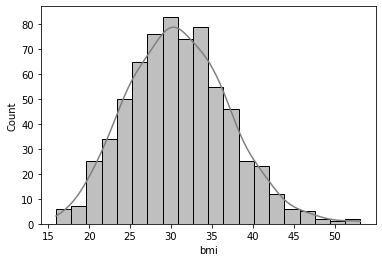

In [104]:
sns.histplot(data=male_bmi,kde=True,color='grey')

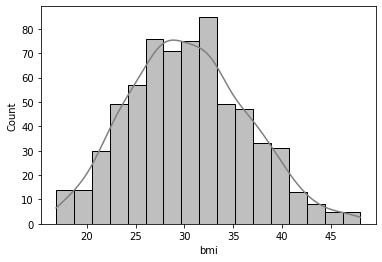

In [105]:
sns.histplot(data=female_bmi,kde=True,color='grey')

### 1.State the null hypothesis and alternative hypothesis
H0 :  μs  <= μns
H 0 :  μm <= μf 

H a :  μm > μf 

α  = 0.05     (95% Confidence Interval)

### 2. Decide the type of hypothesis testing

As there are 2 independent group and as we would like to compare mean of those 2 groups we will going to use use 
**two-sample t test**.

To decide whether to use parametric or non-parametric tests, let's examine whether the assumptions of the two-sample t-test are met.

### 3. Check the assumptions

**Assumptions Of Two Sample T Test :**
    * Continious data
    * Samples data are independent
    * The data follows the normal(Gaussion) distribution
    * Samples variance equality 
    
It is obvious that the first two assumptions are met.(See the EDA notebook)

And also from the above BMI hisgtorams we can that the data are normally distributed.

However, it needs to be clarified whether the assumptions for equality of variance are met or not, 
to do that will perform **Bartlett’s** test instead of Levene’s for variance equality as the data are normally distributed.
(detailed explanation for choosing suitable test :  
https://www.marsja.se/levenes-bartletts-test-of-equality-homogeneity-of-variance-in-python/)


**Bartlett's Test for variance equality**

As the data is normally distributed you can use Bartlett’s test instead of Levene’s. (See the above histograms of female and male bmi

https://www.marsja.se/levenes-bartletts-test-of-equality-homogeneity-of-variance-in-python/


In [41]:
alpha = 0.05
stat, p_val = stats.bartlett(male_bmi, female_bmi)
print("Summary Of Bartlett's Equality of Variance Test")
print('\np-value: %.4f' % p_val)
if p_val < alpha:
    print('Reject Null Hypothesis: the variances are not equal for at least one pair.')
else:
    print('Fail to Reject Null Hypothesis: the variances are equal across all samples.')

Summary Of Bartlett's Equality of Variance Test

p-value: 0.6890
Fail to Reject Null Hypothesis: the variances are equal across all samples.


Since the normality and variance equality assumptions were met we can perform parametric **two sample t-test** .

### 4. Perform hpohesis testing : Two Sample T Test

**Two-Sample T Test**

In [47]:
#Student's Two-Sample t-test
alpha= 0.05
stat, p_val = stats.ttest_ind(male_bmi, female_bmi, alternative='greater',equal_var = True)

print("Summary Of Student's Two-Sample t-test")
print('\np-value: %.4f' % p_val)


Summary Of Student's Two-Sample t-test

p-value: 0.0450
Reject Null Hypothesis: the BMI of females is statistically different than the BMI of males.


### 5. Interpret results

In [92]:
if p_val <alpha:
    print('Reject Null Hypothesis: the BMI of females is statistically different than the BMI of males.')
else:
    print('Fail to Reject Null Hypothesis: the BMI of females and the BMI of males are not statistically different.')

Reject Null Hypothesis: the BMI of females is statistically different than the BMI of males.


# Is the proportion of smokers significantly different in different genders?

We would like to see how the proportions of smokers changing between genders.

* H0 :  pm  =  pf 

* HA :  pm  !=  pf
    
*pm*  = Male Smokers / Total Male Claimants

*pf*  = Female Smokers / Total Female Claimants

In [61]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [86]:
number_of_male = df[df['sex']=='male']['sex'].count()
number_of_female = df[df['sex']=='female']['sex'].count()

male_smokers = df[(df['sex']=='male') & (df['smoker']=='yes')]['sex'].count()
female_smokers = df[(df['sex']=='female') & (df['smoker']=='yes')]['sex'].count()

pm = male_smokers/number_of_male
pf = female_smokers/number_of_female

female_smokers

115

In [77]:
print(f' Proportion of smokers in males, females = {round(pm,4)*100}%, {round(pf,4)*100}% respectively.')

 Proportion of smokers in males, females = 23.52%, 17.37% respectively.


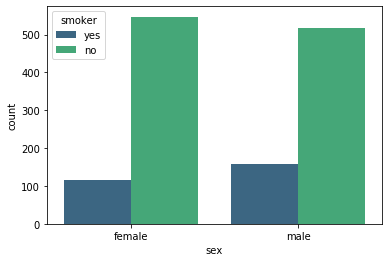

In [80]:
sns.countplot(data=df, x='sex',hue = 'smoker',palette = 'viridis')

As we saw in the graphic the proporion of smokers in different gender are different. But we would like to test whether the differences are statistically significant or not. To do that we will use proportion z-test.

In [87]:
stat, pval = proportions_ztest([number_of_female,number_of_male],[female_smokers, male_smokers])
print(f'Statistic: {stat}\np_value: {pval}')


Statistic: nan
p_value: nan


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\proportion.py:846: RuntimeWarning: invalid value encountered in sqrt
  std_diff = np.sqrt(var_)
C:\Users\merve\AppData\Roaming\Python\Python37\site-packages\scipy\stats\_distn_infrastructure.py:2039: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)
